<a href="https://colab.research.google.com/github/Pravallika-Myneni/Data_science_pipeline/blob/main/pm_milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/income-mapped-zip-code.csv', index_col = [0])
df.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Zipcode,Median_Income,Mean_Income,Age Group,Arrest Date,Arrest Key,Ofns Desc,Pd Desc,Perp Race,Perp Sex,Arrest Precinct,Lat,Lon,LatLon
0,10001,96787,166167,<18,3/24/2019,195084931,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",BLACK,M,14,40.75,-73.99,"(40.75, -73.99)"
1,10001,96787,166167,25-44,7/11/2018,185049784,F.C.A. P.I.N.O.S.,"FUGITIVE,FROM OTHER STATES",WHITE,F,14,40.75,-73.99,"(40.75, -73.99)"


In [3]:
df['Arrest Date'].value_counts()

2/1/2018     1057
1/11/2018    1051
1/24/2018    1028
2/21/2018    1005
1/18/2018     990
             ... 
7/19/2020     162
7/11/2020     159
7/4/2020      152
6/21/2020     149
3/29/2020     148
Name: Arrest Date, Length: 1096, dtype: int64

In [5]:
df['Zipcode'].nunique()

193

In [14]:
zip_value_counts = df['Zipcode'].value_counts()
zip_value_counts

10456    13235
10457    12181
10031    11868
11434    11541
10001    11357
         ...  
11020        5
11021        3
10705        3
11005        3
10803        2
Name: Zipcode, Length: 193, dtype: int64

In [15]:
zip_value_counts[zip_value_counts>100]

10456    13235
10457    12181
10031    11868
11434    11541
10001    11357
         ...  
11425      161
10280      127
11366      126
11040      124
10069      121
Name: Zipcode, Length: 176, dtype: int64

In [24]:
df['Arrest Key'].nunique(), df.shape

(593721, (593721, 14))

In [26]:
df.groupby(['Zipcode', 'Arrest Date']).count()['Arrest Key'].groupby(level = 0).count()

Zipcode
10001    1084
10002    1032
10003     971
10004     300
10007     776
         ... 
11691    1056
11692     789
11693     827
11694     393
11697      27
Name: Arrest Key, Length: 193, dtype: int64

In [27]:
df.columns

Index(['Zipcode', 'Median_Income', 'Mean_Income', 'Age Group', 'Arrest Date',
       'Arrest Key', 'Ofns Desc', 'Pd Desc', 'Perp Race', 'Perp Sex',
       'Arrest Precinct', 'Lat', 'Lon', 'LatLon'],
      dtype='object')

In [28]:
df[['Lat', 'Lon', 'LatLon']]

,Lat,Lon,LatLon
0,40.75,-73.99,"(40.75, -73.99)"
1,40.75,-73.99,"(40.75, -73.99)"
2,40.75,-73.99,"(40.75, -73.99)"
3,40.75,-73.99,"(40.75, -73.99)"
4,40.75,-73.99,"(40.75, -73.99)"
...,...,...,...
593716,40.56,-73.91,"(40.56, -73.91)"
593717,40.57,-73.89,"(40.57, -73.89)"
593718,40.56,-73.92,"(40.56, -73.92)"
593719,40.56,-73.92,"(40.56, -73.92)"


In [29]:
df_ = df.drop(columns = {'LatLon'}).rename(columns =  {col : col.replace(' ', '_') for col in df.columns if col not in ['Lat', 'Lon']})
df_['Arrest_Date'] = pd.to_datetime(df_.Arrest_Date)
df_['week'] = df_['Arrest_Date'].dt.week
df_['day'] = df_['Arrest_Date'].dt.day
df_['month'] = df_['Arrest_Date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
df_.head(2)

,Zipcode,Median_Income,Mean_Income,Age_Group,Arrest_Date,Arrest_Key,Ofns_Desc,Pd_Desc,Perp_Race,Perp_Sex,Arrest_Precinct,Lat,Lon,week,day,month
0,10001,96787,166167,<18,2019-03-24,195084931,ROBBERY,"ROBBERY,OPEN AREA UNCLASSIFIED",BLACK,M,14,40.75,-73.99,12,24,3
1,10001,96787,166167,25-44,2018-07-11,185049784,F.C.A. P.I.N.O.S.,"FUGITIVE,FROM OTHER STATES",WHITE,F,14,40.75,-73.99,28,11,7


May be before clustering, we can rank the ofns_Desc and use that as one more attribute for clustering..

we can use other attributes as well here

# Clustering into high threat - medium threat and low threat zones

In [47]:
clustering_df = df_.copy()[['Zipcode', 'Arrest_Key']]
clustering_df_ = clustering_df.groupby(['Zipcode']).count()['Arrest_Key'].to_frame().reset_index()
clustering_df_['Zipcode'] = clustering_df_['Zipcode'].astype('str') 

In [48]:
clustering_df_.describe()

,Arrest_Key
count,193.000000
mean,3076.274611
std,3008.869490
min,2.000000
25%,709.000000
50%,2222.000000
75%,4528.000000
max,13235.000000


In [49]:
clustering_df_.head(2)

,Zipcode,Arrest_Key
0,10001,11357
1,10002,4775


Is there a point to do this.. convert to str then encode it?? For now, assuming no

In [50]:
"""from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

clustering_df_['Zipcode'] = le.fit_transform(clustering_df_['Zipcode'])

clustering_df_.head(2)"""

"from sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\nclustering_df_['Zipcode'] = le.fit_transform(clustering_df_['Zipcode'])\n\nclustering_df_.head(2)"

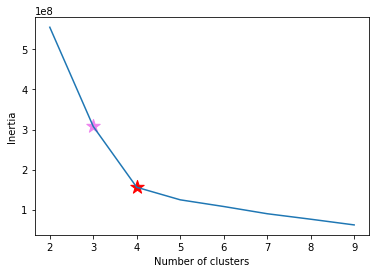

In [71]:
from sklearn.cluster import KMeans
X = np.array(clustering_df_)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias)
plt.scatter(3,inertias[1], s = 200, c = 'violet', marker='*')
plt.scatter(4,inertias[2], s = 200, c = 'red', marker='*')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [73]:
##It gives an idea of how well the objects are classified taking that number of clusters
from sklearn.metrics import silhouette_score
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean', n_jobs=-1)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6368779125486689)
For n_clusters = 3, silhouette score is 0.5591851817579871)
For n_clusters = 4, silhouette score is 0.552016451748841)
For n_clusters = 5, silhouette score is 0.44738944263612895)
For n_clusters = 6, silhouette score is 0.4290966641278433)
For n_clusters = 7, silhouette score is 0.5003995656166276)
For n_clusters = 8, silhouette score is 0.4501427990779994)
For n_clusters = 9, silhouette score is 0.49354448541596246)


Silhouetee score is takiing ages to calculate.. try again later?

In [74]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
pred = y_kmeans

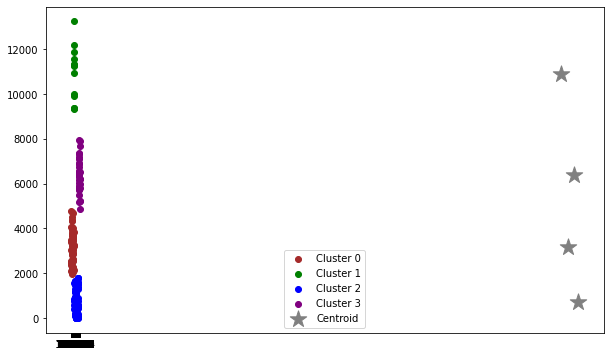

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'gray', label = 'Centroid', marker='*')
plt.legend()

In [77]:
clustering_df_.shape

(193, 2)

In [78]:
pred.shape

(193,)

In [79]:
clustering_df_['Label'] = pred
clustering_df_.head(5)

,Zipcode,Arrest_Key,Label
0,10001,11357,1
1,10002,4775,0
2,10003,4061,0
3,10004,423,2
4,10007,2088,0


In [104]:
clustering_df_[clustering_df_['Label'] ==0].describe()

,Arrest_Key,Label
count,57.000000,57.0
mean,3189.192982,0.0
std,750.669378,0.0
min,1953.000000,0.0
25%,2559.000000,0.0
50%,3196.000000,0.0
75%,3664.000000,0.0
max,4775.000000,0.0


In [105]:
clustering_df_[clustering_df_['Label'] ==1].describe()

,Arrest_Key,Label
count,13.000000,13.0
mean,10895.307692,1.0
std,1220.431507,0.0
min,9342.000000,1.0
25%,9890.000000,1.0
50%,11252.000000,1.0
75%,11541.000000,1.0
max,13235.000000,1.0


In [106]:
clustering_df_[clustering_df_['Label'] == 2].describe()

,Arrest_Key,Label
count,91.000000,91.0
mean,732.395604,2.0
std,560.117902,0.0
min,2.000000,2.0
25%,191.000000,2.0
50%,589.000000,2.0
75%,1292.000000,2.0
max,1808.000000,2.0


In [107]:
clustering_df_[clustering_df_['Label'] ==3].describe()

,Arrest_Key,Label
count,32.00000,32.0
mean,6364.06250,3.0
std,787.34437,0.0
min,4883.00000,3.0
25%,5852.50000,3.0
50%,6335.50000,3.0
75%,6876.75000,3.0
max,7927.00000,3.0


Label which is high threat .... low threat.. based on means may be?

In [83]:
all(clustering_df_.groupby(['Zipcode'])['Label'].nunique()==1)

True

In [89]:
zip_code_mapping = { row['Zipcode']: row['Label']  for i,row in clustering_df_.iterrows()}

## After clustering

In [100]:
mapping_ = df_.groupby(['Zipcode'])['Lat', 'Lon'].agg('min').reset_index()
mapping_["Label"] = mapping_['Zipcode'].apply(lambda x: zip_code_mapping[str(x)])
mapping_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Zipcode,Lat,Lon,Label
0,10001,40.75,-74.00,1
1,10002,40.71,-73.99,0
2,10003,40.73,-73.99,0
3,10004,40.70,-74.02,2
4,10007,40.71,-74.01,0


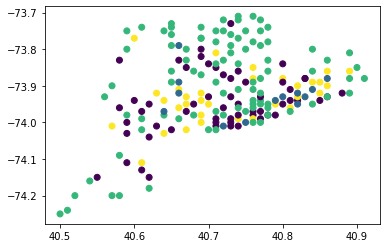

In [101]:
plt.scatter(mapping_['Lat'], mapping_['Lon'], c = mapping_['Label'])

## Time series?

In [115]:
timeseries_df = df_.copy()
timeseries_df['Threat_level']  = timeseries_df['Zipcode'].apply(lambda x: zip_code_mapping[str(x)])

In [116]:
timeseries_df.columns

Index(['Zipcode', 'Median_Income', 'Mean_Income', 'Age_Group', 'Arrest_Date',
       'Arrest_Key', 'Ofns_Desc', 'Pd_Desc', 'Perp_Race', 'Perp_Sex',
       'Arrest_Precinct', 'Lat', 'Lon', 'week', 'day', 'month',
       'Threat_level'],
      dtype='object')

For now, I am using threat_level, Mean_Income, Median_income and arrest_key count

In [133]:
timeseries_df['Mean_Income'] = timeseries_df['Mean_Income'].apply(lambda x: np.nan if x=='-' else x) 
timeseries_df['Median_Income'] = timeseries_df['Median_Income'].apply(lambda x: np.nan if x=='-' else x) 

In [134]:
timeseries_df.isna().sum()

Zipcode               0
Median_Income      5330
Mean_Income        5330
Age_Group             0
Arrest_Date           0
Arrest_Key            0
Ofns_Desc          1102
Pd_Desc            1102
Perp_Race             0
Perp_Sex              0
Arrest_Precinct       0
Lat                   0
Lon                   0
week                  0
day                   0
month                 0
Threat_level          0
dtype: int64

In [138]:
timeseries_df[timeseries_df['Mean_Income'].isna()].Zipcode.unique()

array([10020, 10115, 10199, 10311, 11359, 11371, 11425, 11430])

In [139]:
timeseries_df[timeseries_df['Median_Income'].isna()].Zipcode.unique()

array([10020, 10115, 10199, 10311, 11359, 11371, 11425, 11430])

In [146]:
all(timeseries_df[timeseries_df['Zipcode'] ==10020]['Median_Income'].isna())

True

In [131]:
timeseries_df['Mean_Income'] = timeseries_df['Mean_Income'].astype('int')
timeseries_df['Median_Income'] = timeseries_df['Me_Income'].astype('int')

ValueError: ignored

In [124]:
timeseries_df.groupby(['Arrest_Date'], as_index=False).agg({  'Threat_level' : ['min', 'max', pd.Series.mode],'Mean_Income' : 'mean' ,  'Median_Income' : 'mean', 'Arrest_Key' : 'count'})

TypeError: ignored